# Tensorflow Machine Learning: Gaussian Kernel (base example)
źróło: https://www.guru99.com/kernel-methods-machine-learning.html


In [1]:
import tensorflow as tf

C:\ProgramData\Anaconda3\envs\OLD_TF\lib\site-packages\tensorflow\python\framework\dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\envs\OLD_TF\lib\site-packages\tensorflow\python\framework\dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\envs\OLD_TF\lib\site-packages\tensorflow\python\framework\dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\envs\OLD_TF\lib\site-packages\tensorflow\pyth

In [2]:
tf.__version__

'1.5.0'

Celem tego zestawu danych jest klasyfikacja dochodów poniżej i powyżej 50 tys.. Znając zachowanie każdego gospodarstwa domowego.

### Dlaczego potrzebujesz metod jądra?

Celem każdego klasyfikatora jest prawidłowe przewidywanie klas. W tym celu zestaw danych powinien być rozdzielny. Spójrz na wykres poniżej; dość łatwo jest zauważyć, że wszystkie punkty powyżej czarnej linii należą do pierwszej klasy, a pozostałe punkty do drugiej klasy. Jednak niezwykle rzadko zestaw danych jest tak prosty. W większości przypadków danych nie można oddzielić. Trudno jest naiwnym klasyfikatorom, takim jak regresja logistyczna.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

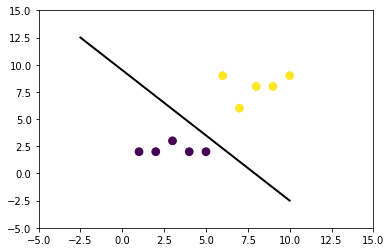

In [4]:
x_lin = np.array([1,2,3,4,5,6,7,8,9,10])
y_lin = np.array([2,2,3,2,2,9,6,8,8,9])
label_lin = np.array([0,0,0,0,0,1,1,1,1,1])
  
fig = plt.figure()
ax=fig.add_subplot(111)
plt.scatter(x_lin, y_lin, c=label_lin, s=60)
plt.plot([-2.5, 10], [12.5, -2.5], 'k-', lw=2)
ax.set_xlim([-5,15])
ax.set_ylim([-5,15])
plt.show()

Na poniższym rysunku przedstawiamy zestaw danych, którego nie można rozdzielić liniowo. Jeśli narysujemy linię prostą, większość punktów nie zostanie sklasyfikowana we właściwej klasie.

Jednym ze sposobów rozwiązania tego problemu jest pobranie zestawu danych i przekształcenie danych w inną mapę obiektów. Oznacza to, że użyjesz funkcji do transformacji danych w innym planie, który powinien być liniowy.

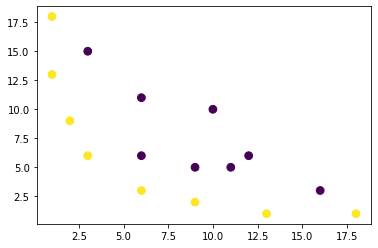

In [5]:
x = np.array([1,1,2,3,3,6,6,6,9,9,10,11,12,13,16,18])
y = np.array([18,13,9,6,15,11,6,3,5,2,10,5,6,1,3,1])
label = np.array([1,1,1,1,0,0,0,1,0,1,0,0,0,1,0,1])

fig = plt.figure()
plt.scatter(x, y, c=label, s=60)
plt.show()

Dane z powyższego rysunku są w planie dwuwymiarowym, którego nie można oddzielić. Możesz spróbować przekształcić te dane w trójwymiar, co oznacza, że tworzysz figurę z 3 osiami.

W naszym przykładzie zastosujemy odwzorowanie wielomianowe, aby doprowadzić nasze dane do wymiaru 3D. Wzór na przekształcenie danych jest następujący.

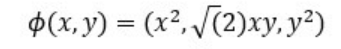

Definiujesz funkcję w Pythonie, aby tworzyć nowe mapy funkcji
Możesz użyć numpy do kodowania powyższej formuły:

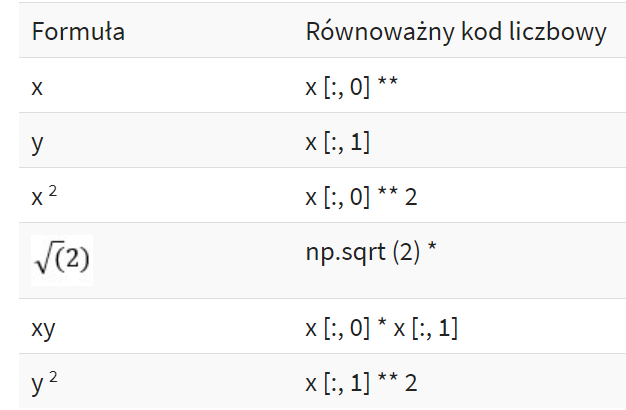

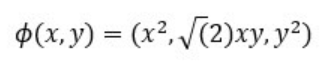

In [6]:
### illustration purpose
def mapping(x, y):    
    x = np.c_[(x, y)]
    if len(x) >	2:                   # jEŻELI WYMIAR JEST >2 TO JEST TO MACIERZ
            x_1 = x[:,0]**2
            x_2 = np.sqrt(2)*x[:,0]*x[:,1]
            x_3 = x[:,1]**2
    else:            
            x_1 = x[0]**2             # JEST TO WEKTOR
            x_2 = np.sqrt(2)*x[0]*x[1]        
            x_3 = x[1]**2   
       
    trans_x = np.array([x_1, x_2, x_3])
       
    return trans_x

Nowe mapowanie powinno mieć 3 wymiary z 16 punktami. Według zdefiniopwanej wyżej funkcji mapujjemy wektory (nie macierze)

In [7]:
x_1  = mapping(x, y)
x_1.shape

(3, 16)

Stwórzmy nowy wykres z odpowiednio 3 osiami, x, y i z.

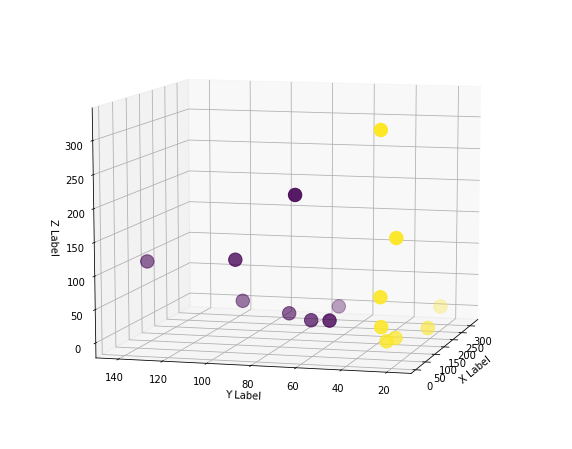

In [8]:
# plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_1[0], x_1[1], x_1[2], c=label, s=180)
ax.view_init(10, 195)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

Widzimy poprawę, ale jeśli zmienimy orientację wykresu, jasne jest, że zestaw danych można teraz rozdzielić

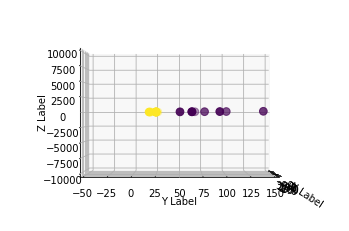

In [9]:
# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_1[0], x_1[1], x_1[1], c=label, s=60)
ax.view_init(0, -180)
ax.set_ylim([150,-50])
ax.set_zlim([-10000,10000])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()	

Aby manipulować dużym zestawem danych i być może trzeba utworzyć więcej niż 2 wymiary, napotkasz duży problem przy użyciu powyższej metody. W rzeczywistości musisz przekształcić wszystkie punkty danych, co oczywiście nie jest zrównoważone. Zajmie ci to wiele lat, a komputerowi może zabraknąć pamięci.

Najczęstszym sposobem na rozwiązanie tego problemu jest użycie jądra .

## Co to jest jądro w uczeniu maszynowym?

Chodzi o to, aby użyć przestrzeni cech wyższego wymiaru, aby dane były prawie liniowo rozdzielalne, jak pokazano na powyższym rysunku.

Istnieje wiele przestrzeni o większych wymiarach, aby punkty danych można było oddzielić. Na przykład pokazaliśmy, że mapowanie wielomianowe to świetny początek.

Wykazaliśmy również, że przy dużej ilości danych transformacja ta nie jest wydajna. Zamiast tego możesz użyć funkcji jądra do zmodyfikowania danych bez zmiany na nowy plan funkcji.

Magią jądra jest znalezienie funkcji, która pozwala uniknąć wszystkich problemów wynikających z obliczeń wielowymiarowych. Rezultatem jądra jest skalar, inaczej mówiąc, wróciliśmy do przestrzeni jednowymiarowej

Po znalezieniu tej funkcji możesz podłączyć ją do standardowego klasyfikatora liniowego.

Zobaczmy przykład, aby zrozumieć koncepcję jądra. Masz dwa wektory, x1 i x2. Celem jest stworzenie wyższego wymiaru za pomocą mapowania wielomianowego. Dane wyjściowe są równe iloczynowi kropkowemu nowej mapy obiektów. Z powyższej metody musisz:

 1. Przekształcenie x1 i x2 w nowy wymiar
 2. Obliczenie iloczynu skalarnego: wspólny dla wszystkich jąder
 3. Przekształcenie x1 i x2 w nowy wymiar
 
 Możesz użyć funkcji utworzonej powyżej, aby obliczyć wyższy wymiar.

### 1. Przekształcenie x1 i x2 w nowy wymiar
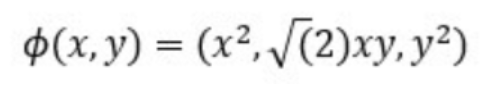

In [10]:
## Kernel
x1 = np.array([3,6])
x2 = np.array([10,10])

x_1 = mapping(x1, x2)
print(x_1)

[[  9.         100.        ]
 [ 25.45584412 141.42135624]
 [ 36.         100.        ]]


### 2. Obliczenie iloczynu skalarnego: wspólny dla wszystkich jąder
Możesz użyć kropki obiektu z numpy do obliczenia iloczynu kropki między pierwszym i drugim wektorem przechowywanym w x_1

In [11]:
np.dot(x_1[:,0], x_1[:,1])

8100.0

In [12]:
x_1[:,0]

array([ 9.        , 25.45584412, 36.        ])

In [13]:
x_1[:,1]

array([100.        , 141.42135624, 100.        ])

### Co to jest 8100?

Dane wyjściowe to 8100. Widzisz problem, musisz zapisać w pamięci nową mapę funkcji, aby obliczyć iloczyn skalarny. Jeśli masz zestaw danych z milionami rekordów, jest on nieskuteczny obliczeniowo.

Zamiast tego można użyć wielomianowego jądra do obliczenia iloczynu bez przekształcania wektora. Ta funkcja oblicza iloczyn iloczynu x1 i x2 tak, jakby te dwa wektory zostały przekształcone w wyższy wymiar. Inaczej mówiąc, funkcja jądra oblicza wyniki iloczynu z innej przestrzeni cech.

Możesz napisać funkcję wielomianowego jądra w Pythonie w następujący sposób:

In [14]:
def polynomial_kernel(x, y, p=2):
    return (np.dot(x, y)) ** p

Jest to moc iloczynu kropkowego dwóch wektorów. Poniżej zwracamy drugi stopień jądra wielomianu. Wynik jest równy drugiej metodzie. To jest magia jądra.

In [15]:
polynomial_kernel(x1, x2, p=2)

8100

Wyszło tak samo a jest barzo szybko i krótko

# Rodzaje metod jądra

Dostępnych jest wiele różnych jąder. Najprostsze jest 
  - jądro liniowe. 
Ta funkcja działa całkiem dobrze przy klasyfikacji tekstu. 

Drugim jądrem jest:

 - Jądro wielomianowe
 - Jądro Gaussa
W przykładzie z TensorFlow użyjemy losowego Fouriera. 
TensorFlow ma wbudowany estymator do obliczania nowej przestrzeni funkcji. 
Ta funkcja jest przybliżeniem funkcji jądra Gaussa.

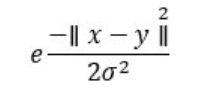

Ta funkcja oblicza podobieństwo między punktami danych w znacznie większej przestrzeni wymiarowej.



## Przykład klasyfikatora jądra gaussowskiego z TensorFlow

Algorytm ma na celu sklasyfikowanie gospodarstwa domowego zarabiającego mniej niż 50 tys.

Ocenisz regresję logistyczną, aby uzyskać model porównawczy. Następnie wytrenujesz klasyfikator jądra, aby sprawdzić, czy możesz uzyskać lepsze wyniki.

Korzystasz z następujących zmiennych z zestawu danych dla dorosłych:

wiek
klasa robocza
fnlwgt
Edukacja
liczba_edukacji
małżeński
zawód
związek
wyścigi
seks
zysk kapitałowy
strata kapitału
godziny_tygodnia
ojczyźnie
etykieta
Przed szkoleniem i oceną modelu postępujesz następująco:

     Krok 1) Zaimportuj biblioteki
     Krok 2) Zaimportuj dane
     Krok 3) Przygotuj dane
     Krok 4) Skonstruuj input_fn
     Krok 5) Zbuduj model logistyczny: model bazowy
     Krok 6) Oceń model
     Krok 7) Zbuduj klasyfikator jądra
     Krok 8) Oceń klasyfikator jądra
     
     
## Krok 1) Zaimportuj biblioteki

Aby zaimportować i wyszkolić model, musisz zaimportować tensorflow, pandy i numpy

In [16]:
from sklearn import model_selection
# import train_test_split
import tensorflow as tf
import pandas as pd
import numpy as np

## Krok 2) Zaimportuj dane
Pobierasz dane z następującej witryny i importujesz je jako ramkę danych panda.

https://archive.ics.uci.edu/ml/machine-learning-databases/adult/

In [17]:
## Define path data
COLUMNS = ['age','workclass', 'fnlwgt', 'education', 'education_num', 'marital', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_week', 'native_country', 'label']
PATH = "c:/3/adult.data"
PATH_test ="c:/3/adult.test"

df_train = pd.read_csv(PATH, skipinitialspace=True, names = COLUMNS, index_col=False)
df_test = pd.read_csv(PATH_test,skiprows = 1, skipinitialspace=True, names = COLUMNS, index_col=False)

#### Zsyfrować dane wynikowe 

In [18]:
label = {'<=50K': 0,'>50K': 1}
df_train.label = [label[item] for item in df_train.label]
df_train.shape

(32561, 15)

In [19]:
df_train.label

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: label, Length: 32561, dtype: int64

In [20]:
label_t = {'<=50K.': 0,'>50K.': 1}
df_test.label = [label_t[item] for item in df_test.label]
df_test.shape

(16281, 15)

In [21]:
df_test.label

0        0
1        0
2        1
3        1
4        0
        ..
16276    0
16277    0
16278    0
16279    0
16280    1
Name: label, Length: 16281, dtype: int64

## Krok 3) Przygotuj dane

Zestaw danych zawiera zarówno funkcje ciągłe, jak i dyskretne. Dobrą praktyką jest standaryzacja wartości zmiennych ciągłych. Możesz użyć funkcji StandardScaler z sci-kit learn. Tworzysz również funkcję zdefiniowaną przez użytkownika, aby ułatwić konwersję zestawu treningowego i zestawu testowego. Zauważ, że łączysz zmienne ciągłe i dyskretne we wspólny zestaw danych, a macierz powinna być typu: float32

In [22]:
COLUMNS_INT = ['age','fnlwgt','education_num','capital_gain', 'capital_loss', 'hours_week']
CATE_FEATURES = ['workclass', 'education', 'marital', 'occupation', 'relationship', 'race', 'sex', 'native_country']
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

def prep_data_str(df):   
    scaler = StandardScaler()    
    le = preprocessing.LabelEncoder()       
    df_toscale = df[COLUMNS_INT]    
    df_scaled = scaler.fit_transform(df_toscale.astype(np.float64))    
    X_1 = df[CATE_FEATURES].apply(le.fit_transform)    
    y = df['label'].astype(np.int32)    
    X_conc = np.c_[df_scaled, X_1].astype(np.float32)
    return X_conc, y

Funkcja służonca do standaryzacji jest gotowa, możesz przekonwertować zestaw danych i utworzyć funkcję input_fn.
### Standaryzuje zbiór treningowy i zbiór testowy

In [23]:
X_train, y_train = prep_data_str(df_train)
X_test, y_test = prep_data_str(df_test)
print(X_train.shape, X_test.shape)

(32561, 14) (16281, 14)


W następnym kroku wytrenujesz regresję logistyczną. Zapewni to podstawową dokładność. Celem jest pokonanie linii bazowej za pomocą innego algorytmu, a mianowicie klasyfikatora jądra.

## Krok 4) Zbuduj model logistyczny: model bazowy

Konstruujesz kolumnę obiektów za pomocą obiektu kolumna_wartości_wartościowych. Zapewni to, że wszystkie zmienne są gęstymi danymi liczbowymi.

In [24]:
feat_column = tf.contrib.layers.real_valued_column('features', dimension=14)

Estymator jest definiowany za pomocą TensorFlow Estimator, instruujesz kolumny obiektów i gdzie zapisać wykres.

In [25]:
estimator = tf.estimator.LinearClassifier(feature_columns=[feat_column],
                                          n_classes=2,
                                          model_dir = "kernel_log"
                                         )

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'kernel_log', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001BF3EBD92B0>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


Trenujesz regresję logistyki przy użyciu mini-partii o wielkości 200.

In [26]:
# Train the model
train_input_fn = tf.estimator.inputs.numpy_input_fn(    
    x={"features": X_train},    
    y=y_train,    
    batch_size=200,    
    num_epochs=None,    
    shuffle=True)

Możesz trenować model z iteracją 1.000

In [27]:
estimator.train(input_fn=train_input_fn, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from kernel_log\model.ckpt-2000
INFO:tensorflow:Saving checkpoints for 2001 into kernel_log\model.ckpt.
INFO:tensorflow:loss = 73.87483, step = 2001
INFO:tensorflow:global_step/sec: 408.046
INFO:tensorflow:loss = 83.65847, step = 2101 (0.249 sec)
INFO:tensorflow:global_step/sec: 463.637
INFO:tensorflow:loss = 82.92302, step = 2201 (0.217 sec)
INFO:tensorflow:global_step/sec: 379.661
INFO:tensorflow:loss = 87.2244, step = 2301 (0.262 sec)
INFO:tensorflow:global_step/sec: 385.747
INFO:tensorflow:loss = 74.04094, step = 2401 (0.261 sec)
INFO:tensorflow:global_step/sec: 477.368
INFO:tensorflow:loss = 81.451416, step = 2501 (0.209 sec)
INFO:tensorflow:global_step/sec: 311.856
INFO:tensorflow:loss = 74.964325, step = 2601 (0.323 sec)
INFO:tensorflow:global_step/sec: 290.655
INFO:tensorflow:loss = 73.83702, step = 2701 (0.340 sec)
INFO:tensorflow:global_step/sec: 431.638
INFO:tensorflow:loss = 86.75461, step = 28

## Krok 6) Oceń model
Zdefiniuj estymator numpy do oceny modelu. Do oceny używasz całego zestawu danych

In [28]:
# Evaluation
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"features": X_test},
    y=y_test,
    batch_size=16281,
    num_epochs=1,
    shuffle=False)
estimator.evaluate(input_fn=test_input_fn, steps=1)

INFO:tensorflow:Starting evaluation at 2019-12-20-07:40:13
INFO:tensorflow:Restoring parameters from kernel_log\model.ckpt-3000
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-12-20-07:40:14
INFO:tensorflow:Saving dict for global step 3000: accuracy = 0.82390517, accuracy_baseline = 0.76377374, auc = 0.8504024, auc_precision_recall = 0.6736692, average_loss = 0.384241, global_step = 3000, label/mean = 0.23622628, loss = 6255.828, prediction/mean = 0.24611712


{'accuracy': 0.82390517,
 'accuracy_baseline': 0.76377374,
 'auc': 0.8504024,
 'auc_precision_recall': 0.6736692,
 'average_loss': 0.384241,
 'label/mean': 0.23622628,
 'loss': 6255.828,
 'prediction/mean': 0.24611712,
 'global_step': 3000}

Masz dokładność 82 procent. W następnej sekcji spróbujesz pokonać klasyfikator logistyczny za pomocą klasyfikatora jądra

## Krok 7) Zbuduj klasyfikator jądra

Estymator jądra nie różni się tak bardzo od tradycyjnego klasyfikatora liniowego, przynajmniej pod względem budowy. Ideą jest wykorzystanie mocy jawnego jądra z liniowym klasyfikatorem.

Aby trenować klasyfikator jądra, potrzebujesz dwóch predefiniowanych estymatorów dostępnych w TensorFlow:

 - RandomFourierFeatureMapper
 - KernelLinearClassifier

W pierwszej sekcji nauczyłeś się, że musisz przekształcić niski wymiar w wysoki za pomocą funkcji jądra. Dokładniej, użyjesz Random Fouriera, który jest przybliżeniem funkcji Gaussa. Na szczęście Tensorflow ma w swojej bibliotece funkcję: RandomFourierFeatureMapper. Model można trenować za pomocą estymatora KernelLinearClassifier.

Aby zbudować model, wykonaj następujące kroki:

1. Ustaw funkcję jądra o wysokim wymiarze
2. Ustaw hiperparametr L2
3. Zbuduj model
4. Trenuj model
5. Oceń model

### Krok A) Ustaw funkcję jądra w wysokim wymiarze

Bieżący zestaw danych zawiera 14 funkcji, które przekształcisz w nowy wysoki wymiar 5000-wymiarowego wektora. Do transformacji używasz losowych funkcji Fouriera. Jeśli przypomnisz sobie formułę jądra Gaussa, zauważysz, że do zdefiniowania jest parametr odchylenia standardowego. Ten parametr kontroluje miarę podobieństwa stosowaną podczas klasyfikacji.

Możesz dostroić wszystkie parametry w RandomFourierFeatureMapper za pomocą:

- input_dim = 14
- output_dim = 5000
- stddev = 4

In [29]:
### PRZYGOTOWANIE JĄDRA
kernel_mapper = tf.contrib.kernel_methods.RandomFourierFeatureMapper(input_dim=14, output_dim=5000, stddev=4, name='rffm')	

Musisz zbudować program do mapowania jądra przy użyciu utworzonych wcześniej kolumn funkcji: feat_column

In [30]:
### Map Kernel
kernel_mappers = {feat_column: [kernel_mapper]}

### Krok B) Ustaw hiperparametr L2

Aby zapobiec nadmiernemu dopasowaniu, za pomocą regulatora L2 penalizujesz funkcję utraty. Ustaw hiperparametr L2 na 0,1, a szybkość uczenia się na 5

In [31]:
optimizer = tf.train.FtrlOptimizer(learning_rate=5, l2_regularization_strength=0.1)

### Krok C) Zbuduj model

Następny krok jest podobny do klasyfikacji liniowej. Używasz wbudowanego estymatora KernelLinearClassifier. Zauważ, że dodajesz wcześniej zdefiniowany program do mapowania jądra i zmieniasz katalog modelu.

In [32]:
### Prep estimator
estimator_kernel = tf.contrib.kernel_methods.KernelLinearClassifier(
    n_classes=2,
    optimizer=optimizer,
    kernel_mappers=kernel_mappers, 
    model_dir="kernel_train")

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001BF3ECAEA20>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'kernel_train'}


### Krok D) Trenuj model

Teraz, gdy zbudowany jest klasyfikator jądra, możesz go trenować. Wybrałeś iterację 2000 razy model

In [33]:
estimator_kernel.fit(input_fn=train_input_fn, steps=2000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from kernel_train\model.ckpt-2000
INFO:tensorflow:Saving checkpoints for 2001 into kernel_train\model.ckpt.
INFO:tensorflow:loss = 0.2952508, step = 2001
INFO:tensorflow:global_step/sec: 85.6003
INFO:tensorflow:loss = 0.36572716, step = 2101 (1.170 sec)
INFO:tensorflow:global_step/sec: 94.108
INFO:tensorflow:loss = 0.36300755, step = 2201 (1.062 sec)
INFO:tensorflow:global_step/sec: 100.999
INFO:tensorflow:loss = 0.2853058, step = 2301 (0.990 sec)
INFO:tensorflow:global_step/sec: 101.789
INFO:tensorflow:loss = 0.34056994, step = 2401 (0.982 sec)
INFO:tensorflow:global_step/sec: 98.4218
INFO:tensorflow:loss = 0.3603817, step = 2501 (1.016 sec)
INFO:tensorflow:global_step/sec: 98.6707
INFO:tensorflow:loss = 0.34708038, step = 2601 (1.013 sec)
INFO:tensorflow:global_step/sec: 102.637
INFO:tensorflow:loss = 0.34972998, step = 2701 (0.974 sec)
INFO:tensorflow:global_step/sec: 90.7824
INFO:tensorflow:loss = 0.35

KernelLinearClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._BinaryLogisticHead object at 0x000001BF3ECAE7B8>, 'feature_columns': {_RealValuedColumn(column_name='features_MAPPED', dimension=5000, default_value=None, dtype=tf.float32, normalizer=None)}, 'optimizer': <tensorflow.python.training.ftrl.FtrlOptimizer object at 0x000001BF3ECAE9B0>, 'kernel_mappers': {_RealValuedColumn(column_name='features', dimension=14, default_value=None, dtype=tf.float32, normalizer=None): [<tensorflow.contrib.kernel_methods.python.mappers.random_fourier_features.RandomFourierFeatureMapper object at 0x000001BF3FF414E0>]}})

## Krok E) Oceń model

Na koniec oceniasz wydajność swojego modelu. Powinieneś być w stanie pokonać regresję logistyczną.

In [34]:
eval_metrics = estimator_kernel.evaluate(input_fn=test_input_fn, steps=1)

INFO:tensorflow:Starting evaluation at 2019-12-20-07:44:55
INFO:tensorflow:Restoring parameters from kernel_train\model.ckpt-4000
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-12-20-07:44:56
INFO:tensorflow:Saving dict for global step 4000: accuracy = 0.8430072, accuracy/baseline_label_mean = 0.23622628, accuracy/threshold_0.500000_mean = 0.8430072, auc = 0.89507145, auc_precision_recall = 0.73904335, global_step = 4000, labels/actual_label_mean = 0.23622628, labels/prediction_mean = 0.23067798, loss = 0.333913, precision/positive_threshold_0.500000_mean = 0.73643696, recall/positive_threshold_0.500000_mean = 0.5223609


In [37]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"features": X_test},
    y=y_test,
    batch_size=16281,
    num_epochs=1,
    shuffle=False)
estimator_kernel.evaluate(input_fn=test_input_fn, steps=1)

INFO:tensorflow:Starting evaluation at 2019-12-20-07:52:28
INFO:tensorflow:Restoring parameters from kernel_train\model.ckpt-4000
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-12-20-07:52:29
INFO:tensorflow:Saving dict for global step 4000: accuracy = 0.8430072, accuracy/baseline_label_mean = 0.23622628, accuracy/threshold_0.500000_mean = 0.8430072, auc = 0.89507145, auc_precision_recall = 0.73904335, global_step = 4000, labels/actual_label_mean = 0.23622628, labels/prediction_mean = 0.23067798, loss = 0.333913, precision/positive_threshold_0.500000_mean = 0.73643696, recall/positive_threshold_0.500000_mean = 0.5223609


{'loss': 0.333913,
 'accuracy': 0.8430072,
 'labels/prediction_mean': 0.23067798,
 'labels/actual_label_mean': 0.23622628,
 'accuracy/baseline_label_mean': 0.23622628,
 'auc': 0.89507145,
 'auc_precision_recall': 0.73904335,
 'accuracy/threshold_0.500000_mean': 0.8430072,
 'precision/positive_threshold_0.500000_mean': 0.73643696,
 'recall/positive_threshold_0.500000_mean': 0.5223609,
 'global_step': 4000}

Ostateczna dokładność wynosi 84%, jest to 2% poprawy w porównaniu z regresją logistyczną. Istnieje kompromis między poprawą dokładności a kosztem obliczeniowym. Musisz pomyśleć, czy poprawa o 2% jest warta czasu poświęconego przez inny klasyfikator i czy ma to istotny wpływ na Twoją firmę.

## streszczenie

Jądro jest doskonałym narzędziem do przekształcania danych nieliniowych na (prawie) liniowe. Wadą tej metody jest jej czasochłonne obliczeniowo i kosztowne.

Poniżej znajduje się najważniejszy kod do szkolenia klasowego jądra

Ustaw funkcję jądra o wysokim wymiarze

input_dim = 14
output_dim = 5000
stddev = 4

In [38]:
Prep Kernelkernel_mapper = tf.contrib.kernel_methods.RandomFourierFeatureMapper(input_dim=14, output_dim=5000, stddev=4, name='rffm')	

SyntaxError: invalid syntax (<ipython-input-38-c823e9ab69a1>, line 1)

## Set the L2 hyperparameter

In [39]:
optimizer = tf.train.FtrlOptimizer(learning_rate=5, l2_regularization_strength=0.1)

### Build the model

In [ ]:
estimator_kernel = tf.contrib.kernel_methods.KernelLinearClassifier(    n_classes=2,    
	optimizer=optimizer,    
    kernel_mappers=kernel_mappers,    
    model_dir="kernel_train")	

### Train the model

In [40]:
estimator_kernel.fit(input_fn=train_input_fn, steps=2000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from kernel_train\model.ckpt-4000
INFO:tensorflow:Saving checkpoints for 4001 into kernel_train\model.ckpt.
INFO:tensorflow:loss = 0.37057853, step = 4001
INFO:tensorflow:global_step/sec: 89.48
INFO:tensorflow:loss = 0.3160325, step = 4101 (1.119 sec)
INFO:tensorflow:global_step/sec: 85.7953
INFO:tensorflow:loss = 0.28366426, step = 4201 (1.167 sec)
INFO:tensorflow:global_step/sec: 76.1532
INFO:tensorflow:loss = 0.288921, step = 4301 (1.320 sec)
INFO:tensorflow:global_step/sec: 73.1356
INFO:tensorflow:loss = 0.36148742, step = 4401 (1.361 sec)
INFO:tensorflow:global_step/sec: 77.4846
INFO:tensorflow:loss = 0.30198005, step = 4501 (1.290 sec)
INFO:tensorflow:global_step/sec: 73.2916
INFO:tensorflow:loss = 0.31932357, step = 4601 (1.364 sec)
INFO:tensorflow:global_step/sec: 86.8564
INFO:tensorflow:loss = 0.37302035, step = 4701 (1.152 sec)
INFO:tensorflow:global_step/sec: 88.6471
INFO:tensorflow:loss = 0.394

KernelLinearClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._BinaryLogisticHead object at 0x000001BF3ECAE7B8>, 'feature_columns': {_RealValuedColumn(column_name='features_MAPPED', dimension=5000, default_value=None, dtype=tf.float32, normalizer=None)}, 'optimizer': <tensorflow.python.training.ftrl.FtrlOptimizer object at 0x000001BF3ECAE9B0>, 'kernel_mappers': {_RealValuedColumn(column_name='features', dimension=14, default_value=None, dtype=tf.float32, normalizer=None): [<tensorflow.contrib.kernel_methods.python.mappers.random_fourier_features.RandomFourierFeatureMapper object at 0x000001BF3FF414E0>]}})

### Evaluate the model

In [41]:
eval_metrics = estimator_kernel.evaluate(input_fn=test_input_fn, steps=1)

INFO:tensorflow:Starting evaluation at 2019-12-20-08:01:11
INFO:tensorflow:Restoring parameters from kernel_train\model.ckpt-6000
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-12-20-08:01:13
INFO:tensorflow:Saving dict for global step 6000: accuracy = 0.8448498, accuracy/baseline_label_mean = 0.23622628, accuracy/threshold_0.500000_mean = 0.8448498, auc = 0.8970409, auc_precision_recall = 0.743697, global_step = 6000, labels/actual_label_mean = 0.23622628, labels/prediction_mean = 0.23997565, loss = 0.33022436, precision/positive_threshold_0.500000_mean = 0.72088355, recall/positive_threshold_0.500000_mean = 0.5600624
